<div class="alert alert-block alert-info">
    <b> MSBA SMA Assignment #1 </b><br>
By: <br>
    1. Ambarish Narayan (an32967) <br>
    2. Bhuvana (bk24542) <br>
    3. Meghavi Singhaniya (ms89872) <br>
    4. Meenakshi (ms88544) <br>
    5. Vaibhav Nagar (vn5339) <br>
    6. Vaishnavi (vg23798)<br>
</div>

<div class="alert alert-block alert-success">

__Part I - Predicting Influencers:__
    
We utilized a dataset from Kaggle containing Twitter activity data to build a model predicting influencers. After thorough analysis, we created an analytic model to classify influencers and identified the best predictors of influence.
</div>

Importing Data and Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from numpy import asarray
from xgboost import XGBClassifier
import warnings
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore",category=UserWarning)

In [2]:
# read data
data = pd.read_csv('train.csv')
#test = pd.read_csv("test.csv")
data.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


__Cleaning the data from the file__

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [4]:
# dropping duplicates
data = data.drop_duplicates()
#test =test.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5368 non-null   int64  
 1   A_follower_count     5368 non-null   int64  
 2   A_following_count    5368 non-null   int64  
 3   A_listed_count       5368 non-null   int64  
 4   A_mentions_received  5368 non-null   float64
 5   A_retweets_received  5368 non-null   float64
 6   A_mentions_sent      5368 non-null   float64
 7   A_retweets_sent      5368 non-null   float64
 8   A_posts              5368 non-null   float64
 9   A_network_feature_1  5368 non-null   int64  
 10  A_network_feature_2  5368 non-null   float64
 11  A_network_feature_3  5368 non-null   float64
 12  B_follower_count     5368 non-null   int64  
 13  B_following_count    5368 non-null   int64  
 14  B_listed_count       5368 non-null   int64  
 15  B_mentions_received  5368 non-null   f

__To begin, we look at the correlation between features and decide which features to retain and which ones to retain so that we have a proper set of features to work with and avoid duplication among the features__

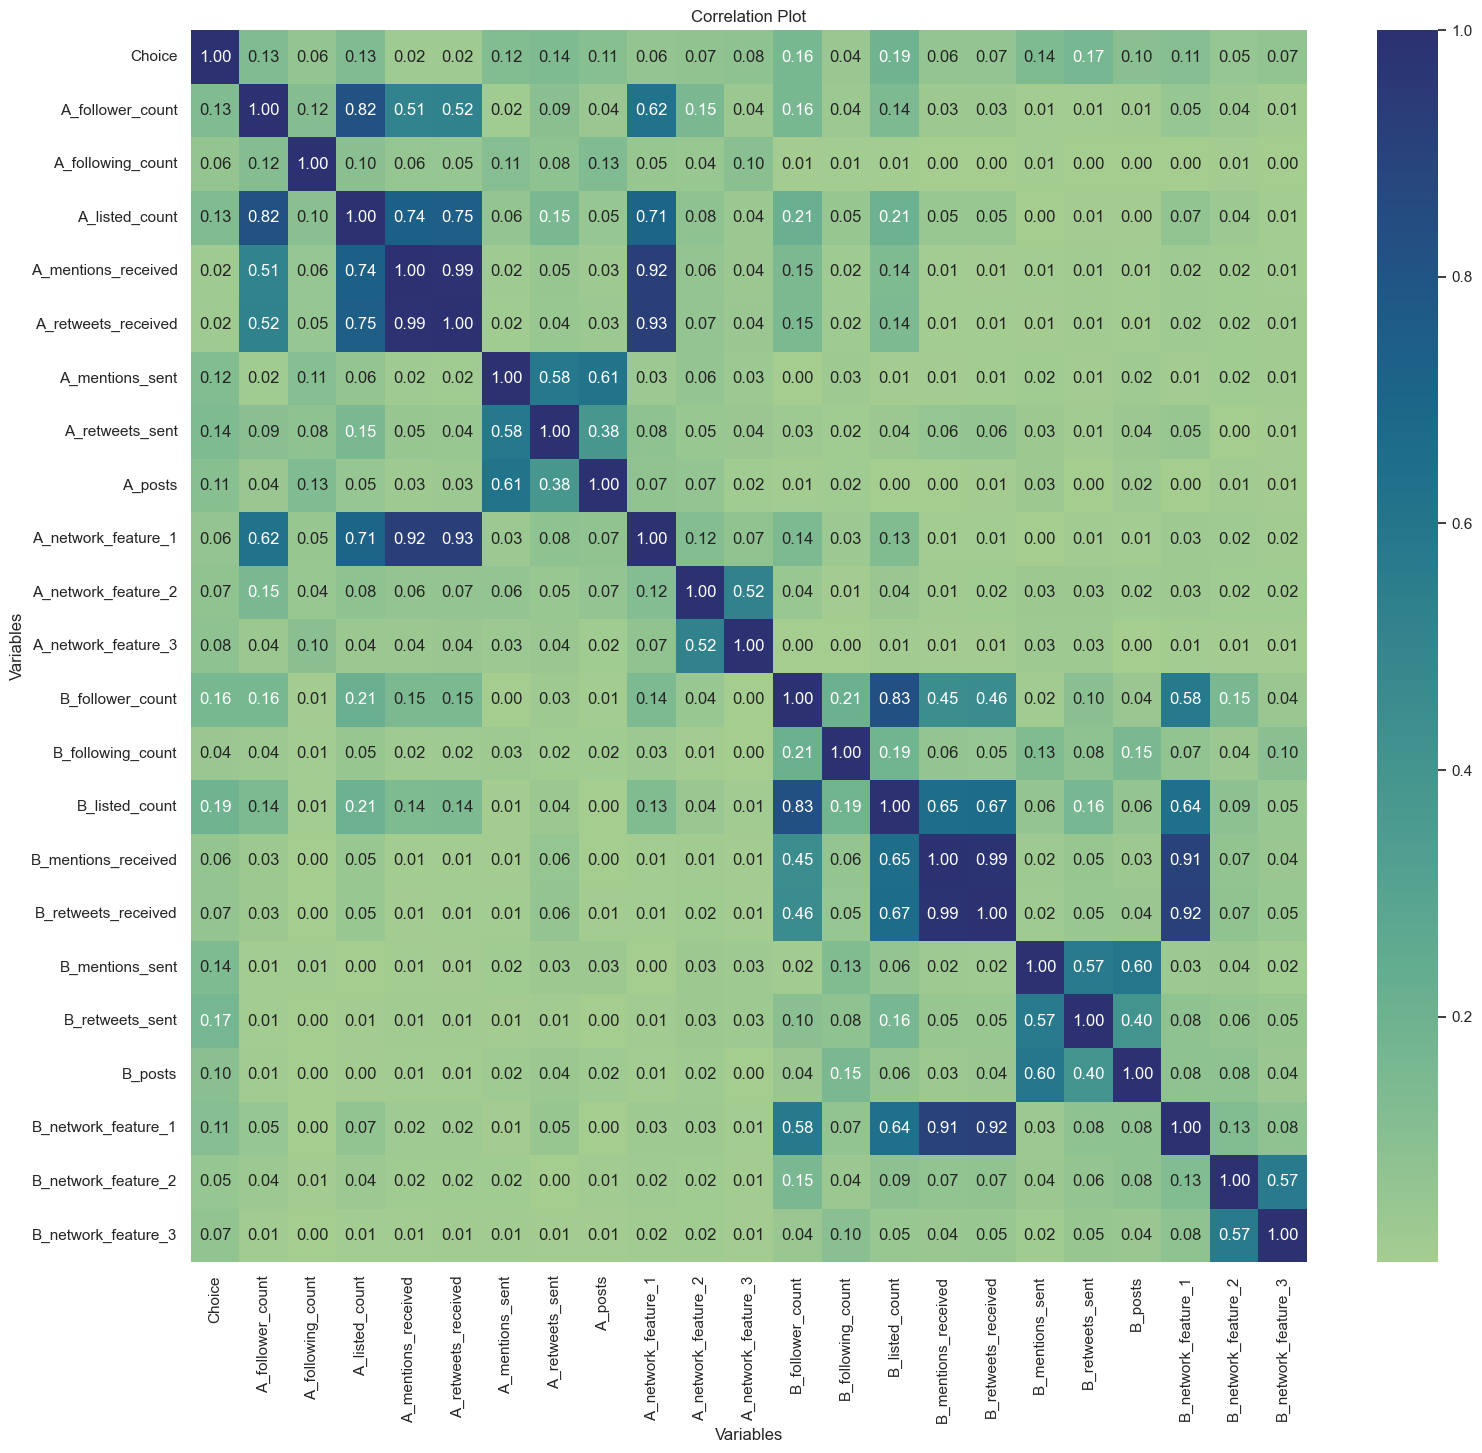

In [5]:
# Calculate the correlation matrix
correlation_matrix = data.corr().abs()

# Finding pairs of columns with correlation greater than a threshold
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.90:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlated_pair = (colname_i, colname_j)
            highly_correlated_columns.add(correlated_pair)

# Create the correlation plot
sns.set(style="white")
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="crest")
plt.title("Correlation Plot")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

__Checking and removing the most correlated columns to reduce the number of features in the dataset__

In [6]:
highly_correlated_columns

{('A_network_feature_1', 'A_mentions_received'),
 ('A_network_feature_1', 'A_retweets_received'),
 ('A_retweets_received', 'A_mentions_received'),
 ('B_network_feature_1', 'B_mentions_received'),
 ('B_network_feature_1', 'B_retweets_received'),
 ('B_retweets_received', 'B_mentions_received')}

__Considering the highly correlated columns, we can see that mentions recieved were highly correlated with retweets recieved - we had to drop one of them to remove collinearity. We decide to remove mentions since retweets tell a better story about connections.__

In [7]:
# Chose to remove mentions received columns
columns_to_remove = ['A_mentions_received', 'B_mentions_received']

# Remove highly correlated columns
data = data.drop(columns=columns_to_remove)
#test = test.drop(columns=columns_to_remove)

# Display the remaining columns
print("Remaining columns after removing highly correlated columns:")
print(data.columns)

Remaining columns after removing highly correlated columns:
Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_retweets_received', 'A_mentions_sent', 'A_retweets_sent', 'A_posts',
       'A_network_feature_1', 'A_network_feature_2', 'A_network_feature_3',
       'B_follower_count', 'B_following_count', 'B_listed_count',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')


__Checking the top features__

In [8]:
data_X = data.drop(columns=['Choice'])

from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_X)

# Define models
models = {
    'RandomForest': RandomForestClassifier(max_depth =10, min_samples_leaf= 4, min_samples_split= 10, n_estimators= 200),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier(),
}

best_model = None
best_accuracy = 0

# Store accuracies of all models
model_accuracies = {}

# Iterate over models
for model_name, model in models.items():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_X, data['Choice'], test_size=0.3, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)

    # Store accuracy for the current model
    model_accuracies[model_name] = accuracy

    # Check if current model is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_y_pred = y_pred
        best_y_test = y_test
        best_X_test = X_test
        if hasattr(model, 'feature_importances_'):
            feature_importances = model.feature_importances_
            top_10_features_idx = np.argsort(feature_importances)[::-1][:10]
            top_10_features = X_train.columns[top_10_features_idx]
            print(f"Top features for {model_name}:")
            print(top_10_features)

    # Print confusion matrix
    print(f"\nConfusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy of {model_name}: {round(accuracy,4)}")

# Print accuracies of all models
print("\nAccuracies of all models:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {round(accuracy,4)}")

# Print best model and its accuracy
print(f"\nAfter looking at the accuracies we go with the model with the highest accuracy:")
print(f"Best model: {best_model}")
print(f"Accuracy of best model: {round(best_accuracy,4)}")


Top features for RandomForest:
Index(['A_listed_count', 'A_network_feature_1', 'A_follower_count',
       'B_listed_count', 'B_network_feature_1', 'B_follower_count',
       'B_retweets_received', 'A_retweets_received', 'B_posts',
       'A_network_feature_3'],
      dtype='object')

Confusion matrix for RandomForest:
[[627 180]
 [169 635]]
Accuracy of RandomForest: 0.7834

Confusion matrix for LogisticRegression:
[[598 209]
 [195 609]]
Accuracy of LogisticRegression: 0.7492

Confusion matrix for KNeighborsClassifier:
[[585 222]
 [194 610]]
Accuracy of KNeighborsClassifier: 0.7418

Confusion matrix for DecisionTreeClassifier:
[[559 248]
 [227 577]]
Accuracy of DecisionTreeClassifier: 0.7052

Confusion matrix for XGBClassifier:
[[618 189]
 [182 622]]
Accuracy of XGBClassifier: 0.7697

Accuracies of all models:
RandomForest: 0.7834
LogisticRegression: 0.7492
KNeighborsClassifier: 0.7418
DecisionTreeClassifier: 0.7052
XGBClassifier: 0.7697

After looking at the accuracies we go with the m

__Now, given that we have Random Forest Classifier as our best model, we want to see if there is a way to reduce the number of columns or features in the dataset that will allow the model to perform better by merging the information of the existing columns by taking a difference between A and B columns and by dividing them to see if we get better results__

__Checking Whether A-B is better or A/B and creating new columns accordingly__

In [9]:
# Create new dataframes to store the newly created variables
sub_data = pd.DataFrame()
div_data = pd.DataFrame()

# Create new variables by performing mathematical operations
for col_A, col_B in zip(data.filter(regex='^A_').columns, data.filter(regex='^B_').columns):
    if (data[col_B] != 0).all():
        new_col_A = col_A + '_div_' + col_B
        new_col_B = col_A + '_sub_' + col_B
        div_data[new_col_A] = data[col_A] / data[col_B]
        sub_data[new_col_B] = data[col_A] - data[col_B]
    else:
        new_col_B = col_A + '_sub_' + col_B
        sub_data[new_col_B] = data[col_A] - data[col_B]
        print(col_B, "cannot perform div operation as it has O value")

# Correlation between the newly created variables and the target variable 'Choice'
corr_div = div_data.corrwith(data['Choice']).sort_values()
corr_sub = sub_data.corrwith(data['Choice']).sort_values()

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Split the data into training and testing sets for 'div_data'
X_train_div, X_test_div, y_train_div, y_test_div = train_test_split(div_data, data['Choice'], test_size=0.2, random_state=42)

# Fit the model on the training data for 'div_data'
rf.fit(X_train_div, y_train_div)

# Make predictions on the testing data for 'div_data'
y_pred_div = rf.predict(X_test_div)

# Calculate the mean squared error for 'div_data'
mse_div = mean_squared_error(y_test_div, y_pred_div)

# Split the data into training and testing sets for 'sub_data'
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(sub_data, data['Choice'], test_size=0.2, random_state=42)

# Fit the model on the training data for 'sub_data'
rf.fit(X_train_sub, y_train_sub)

# Make predictions on the testing data for 'sub_data'
y_pred_sub = rf.predict(X_test_sub)

# Calculate the mean squared error for 'sub_data'
mse_sub = mean_squared_error(y_test_sub, y_pred_sub)

# Compare the correlation, feature importance, and MSE
if (corr_div.abs().mean() >= corr_sub.abs().mean()) & (np.mean(rf.feature_importances_) >= np.mean(rf.feature_importances_)) & (mse_div <= mse_sub):
    print("\033[1m Div_data performs better than Sub_data \033[0m")
    del sub_data
else:
    print("\033[1m Sub_data performs better than Div_data \033[0m")
    del div_data


B_following_count cannot perform div operation as it has O value
B_listed_count cannot perform div operation as it has O value
B_network_feature_1 cannot perform div operation as it has O value
B_network_feature_2 cannot perform div operation as it has O value
B_network_feature_3 cannot perform div operation as it has O value
 Sub_data performs better than Div_data 



__From the above, we can see that the columns involving differences between columns rather than ratios provide a better MSE when we fit the data to a prediction model__



__Now we have the difference columns and we want to remove the columns with the highest correlation so that we can avoid duplication of factors that are highly correlated__


In [10]:
# Normalize the concatenated data
scaler = MinMaxScaler()
all_features_normalized = pd.DataFrame(scaler.fit_transform(sub_data), columns=sub_data.columns)

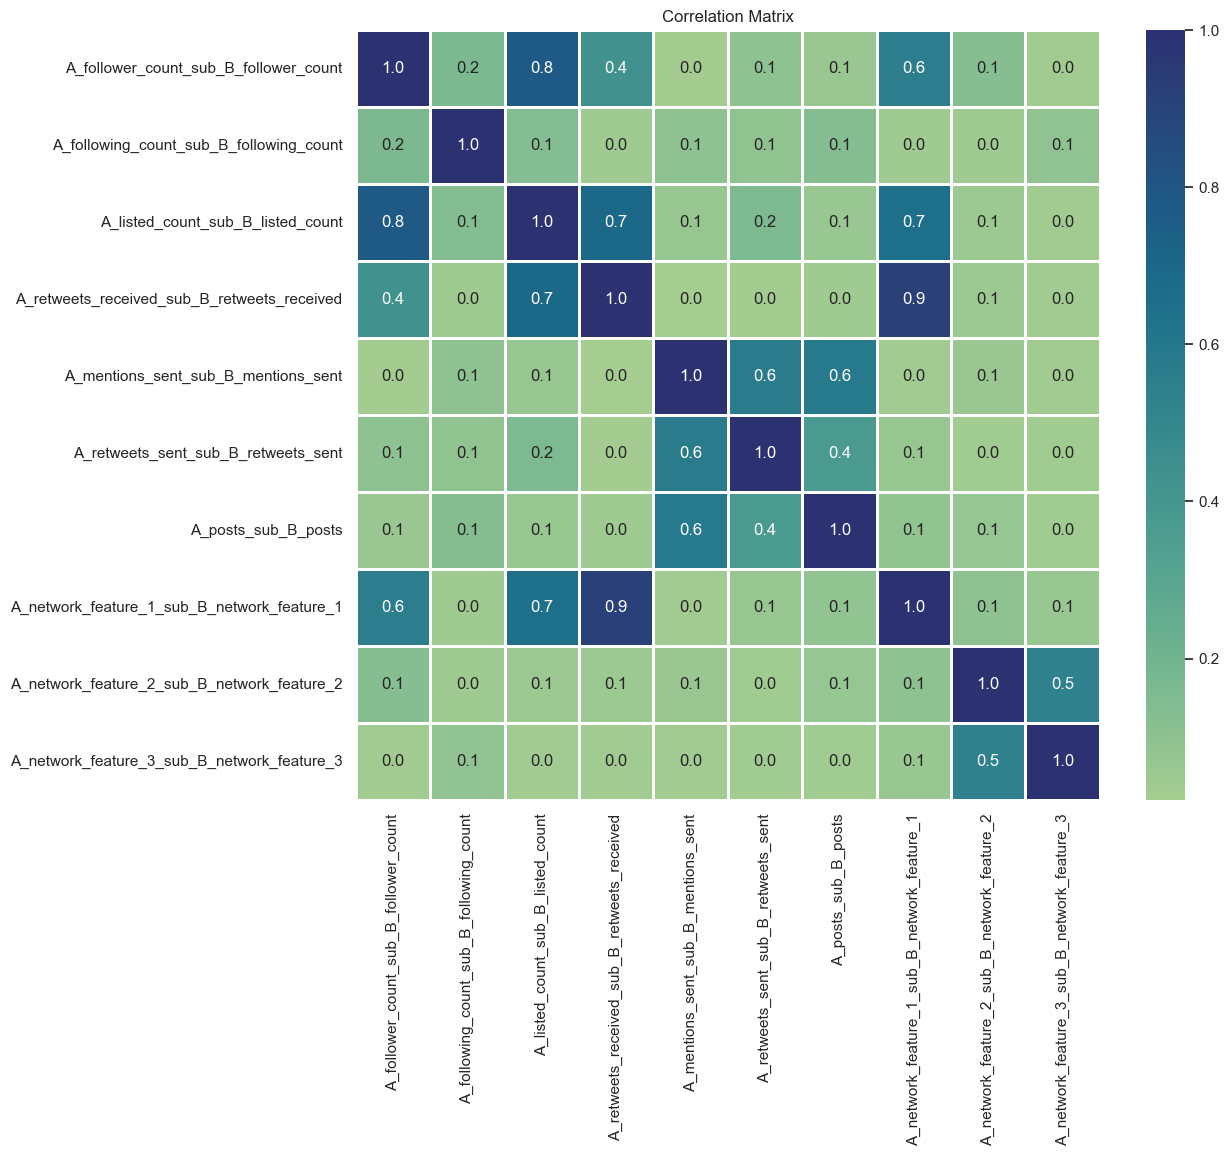

In [11]:
# Calculate the correlation matrix
correlation_matrix = all_features_normalized.corr().abs()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".1f", linewidths=1)
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Finding pairs of columns with correlation greater than a threshold 0.9
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.90:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            correlated_pair = (colname_i, colname_j)
            highly_correlated_columns.add(correlated_pair)

highly_correlated_columns


{('A_network_feature_1_sub_B_network_feature_1',
  'A_retweets_received_sub_B_retweets_received')}


__Considering the difference dataset, we can see that the difference in retweets columns is still highly correlated ~0.9 - so we decide to drop in lieu of Network Feature 1 which essentially is degree hence capturing the retweets & mentions both__


In [13]:
# Chose to remove retweets reeceived as it has high correlation
column_to_remove = ['A_retweets_received_sub_B_retweets_received']

# Remove highly correlated columns
Final = all_features_normalized.drop(columns=column_to_remove)

# Display the remaining columns
print("Remaining columns after removing highly correlated columns:")
print(Final.columns)

Remaining columns after removing highly correlated columns:
Index(['A_follower_count_sub_B_follower_count',
       'A_following_count_sub_B_following_count',
       'A_listed_count_sub_B_listed_count',
       'A_mentions_sent_sub_B_mentions_sent',
       'A_retweets_sent_sub_B_retweets_sent', 'A_posts_sub_B_posts',
       'A_network_feature_1_sub_B_network_feature_1',
       'A_network_feature_2_sub_B_network_feature_2',
       'A_network_feature_3_sub_B_network_feature_3'],
      dtype='object')


In [14]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   A_follower_count_sub_B_follower_count        5368 non-null   float64
 1   A_following_count_sub_B_following_count      5368 non-null   float64
 2   A_listed_count_sub_B_listed_count            5368 non-null   float64
 3   A_mentions_sent_sub_B_mentions_sent          5368 non-null   float64
 4   A_retweets_sent_sub_B_retweets_sent          5368 non-null   float64
 5   A_posts_sub_B_posts                          5368 non-null   float64
 6   A_network_feature_1_sub_B_network_feature_1  5368 non-null   float64
 7   A_network_feature_2_sub_B_network_feature_2  5368 non-null   float64
 8   A_network_feature_3_sub_B_network_feature_3  5368 non-null   float64
dtypes: float64(9)
memory usage: 377.6 KB


__We now have 5368 rows of data with 9 features to work with instead of all the original columns we had before. Now we consider the difference dataset going forward__

__Trying different models__

In [15]:
# Define models
models = {
    'RandomForest': RandomForestClassifier(max_depth =10, min_samples_leaf=4, min_samples_split= 10, n_estimators= 200),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'XGBClassifier': XGBClassifier(),
}

best_model = None
best_accuracy = 0

# Store accuracies of all models
model_accuracies = {}

# Iterate over models
for model_name, model in models.items():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(Final, data['Choice'], test_size=0.33, random_state=42)

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = model.score(X_test, y_test)

    # Store accuracy for the current model
    model_accuracies[model_name] = accuracy

    # Check if current model is the best
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_y_pred = y_pred
        best_y_test = y_test
        best_X_test = X_test

    # Print confusion matrix
    print(f"\nConfusion matrix for {model_name}:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy of {model_name}: {round(accuracy,4)}")

# Print accuracies of all models
print("\nAccuracies of all models:")
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name}: {round(accuracy,4)}")

# Print best model and its accuracy
print(f"\nAfter looking at the accuracies we go with the model with the highest accuracy:")
print(f"Best model: {best_model}")
print(f"Accuracy of best model: {round(best_accuracy,4)}")



Confusion matrix for RandomForest:
[[704 186]
 [179 703]]
Accuracy of RandomForest: 0.794

Confusion matrix for LogisticRegression:
[[563 327]
 [222 660]]
Accuracy of LogisticRegression: 0.6902

Confusion matrix for KNeighborsClassifier:
[[617 273]
 [284 598]]
Accuracy of KNeighborsClassifier: 0.6857

Confusion matrix for DecisionTreeClassifier:
[[603 287]
 [270 612]]
Accuracy of DecisionTreeClassifier: 0.6857

Confusion matrix for XGBClassifier:
[[669 221]
 [205 677]]
Accuracy of XGBClassifier: 0.7596

Accuracies of all models:
RandomForest: 0.794
LogisticRegression: 0.6902
KNeighborsClassifier: 0.6857
DecisionTreeClassifier: 0.6857
XGBClassifier: 0.7596

After looking at the accuracies we go with the model with the highest accuracy:
Best model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)
Accuracy of best model: 0.794


__CV for the best parameter values (Getting the best parameters)__


In [16]:
# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Add tqdm for progress bar
with tqdm(total=len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])) as pbar:
    def update_progress_bar(*args, **kwargs):
        pbar.update(1)
    grid_search.progress_callback = update_progress_bar
    grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best parameters and best model
print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Evaluate the best model on the testing data
best_accuracy = best_model.score(X_test, y_test)
print("Accuracy of best model:", round(best_accuracy,3))

  0%|          | 0/81 [00:00<?, ?it/s]

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf

  0%|          | 0/81 [09:09<?, ?it/s]

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Model: RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)
Accuracy of best model: 0.789


In [17]:
data_copy=data.copy()
Final_copy=Final.copy()
data_copy['predicted_Y'] = best_model.predict(Final_copy)

__Checking accuracy of different models__

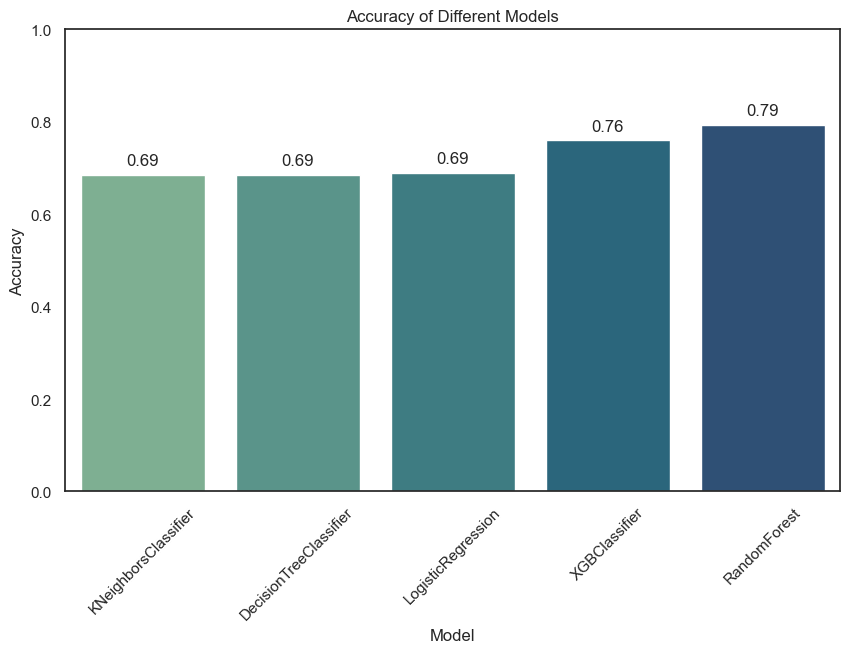

In [18]:
import warnings
# Suppress FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Sort model accuracies in ascending order
sorted_model_accuracies = {k: v for k, v in sorted(model_accuracies.items(), key=lambda item: item[1])}

# Plot model accuracies in ascending order with numbers on top of bars
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_model_accuracies.keys()), y=list(sorted_model_accuracies.values()), palette='crest')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add numbers on top of bars
for index, value in enumerate(sorted_model_accuracies.values()):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center')

plt.show()

__From the above accuracy plot , we can see that Random Forest has the best accuracy__

__Confusion Matrix for Random Forest - Our best performing model!__

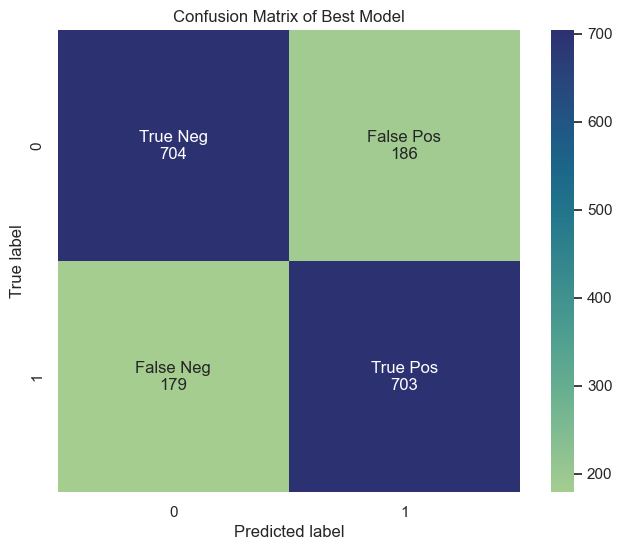

In [19]:
# Define the confusion matrix
cf_matrix = confusion_matrix(best_y_test, best_y_pred)

# Define group names and counts
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

# Plot the confusion matrix with group names
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest', square=True,
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix of Best Model')
plt.show()

__Now that we have the best model in place, we want to find the best features of the dataset and find the weights of the network features to be used for the latter part__

__Top Features of the Dataset using Random Forest Method__

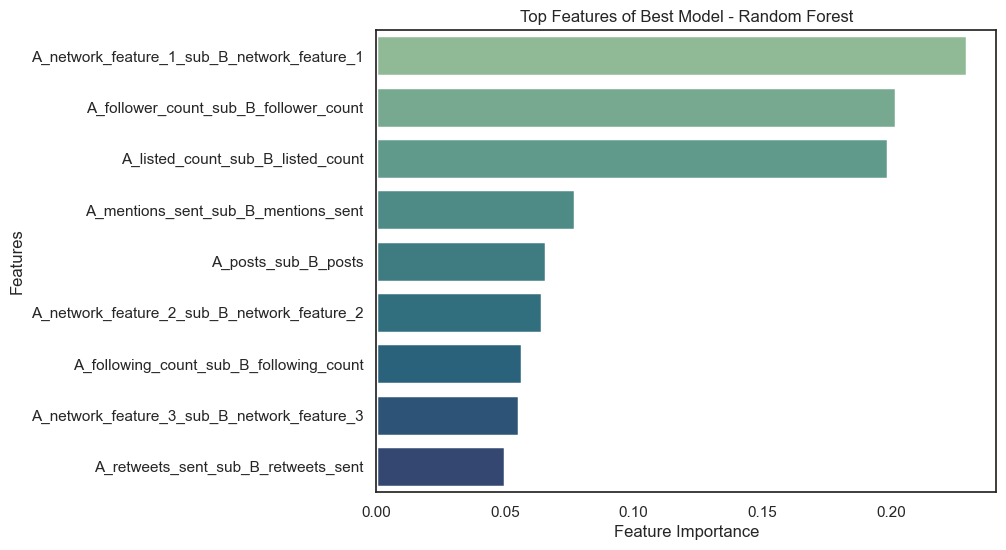

In [20]:
# Get feature importances of the best model
if hasattr(best_model, 'feature_importances_'):
    feature_importances = pd.Series(best_model.feature_importances_, index=Final.columns)
    top_features = feature_importances.nlargest(20)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_features.values, y=top_features.index, palette='crest', linewidth=2.5)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Top Features of Best Model - Random Forest')
    plt.show()



__We see top 3 features from our best performing model are:__
1. Listed Count Difference
2. Follower Count Difference
3. Network Feature 1 (aka Degree) Difference

In [21]:
# Find only network feature importance
feature_importance_df = feature_importances.reset_index()
feature_importance_df.columns = ['Feature', 'Importance']
network_feature_importance = feature_importance_df[-3:]

In [22]:
# Sum of feature importances
sum_importance = network_feature_importance['Importance'].sum()

# Normalize feature importances
network_feature_importance['Norm_Importance'] = network_feature_importance['Importance'] / sum_importance

network_feature_importance

C:\Users\naray\AppData\Local\Temp\ipykernel_24904\856276929.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  network_feature_importance['Norm_Importance'] = network_feature_importance['Importance'] / sum_importance


,Feature,Importance,Norm_Importance
6,A_network_feature_1_sub_B_network_feature_1,0.229533,0.656988
7,A_network_feature_2_sub_B_network_feature_2,0.064445,0.184461
8,A_network_feature_3_sub_B_network_feature_3,0.055393,0.158551



#### How can a business use your model/results?

Businesses can leverage the developed model and its results in several ways to gain insights and make informed decisions:

1. **Identifying Influencers:** Target influential individuals for collaborations and marketing campaigns.

2. **Optimize Strategies:** Tailor marketing approaches based on influential factors.

3. **Allocate Resources Efficiently:** Focus efforts on enhancing key predictors of influence.

4. **Customize Engagement:** Tailor communication and incentives for different influence levels.

5. **Inform Product Development:** Develop products aligned with characteristics associated with influence.

6. **Conduct Competitive Analysis:** Identify key influencers in the industry for benchmarking.

7. **Mitigate Risks:** Proactively address potential risks associated with influencers.

8. **Select Partnerships:** Choose partners based on their influence for enhanced visibility and credibility.

<div class="alert alert-block alert-success">

__Financial Impact Analysis:__
We calculated the financial value of our model by estimating the lift in expected net profit from using analytics to identify influencers. This analysis showcased the tangible benefits of leveraging analytics for influencer marketing strategies.
    </div>


<div class="alert alert-block alert-success">

#### No Analytics Strategy

- **Investment:** \\$10 (\\$5 each for A and B)
- The gross profit is determined by the product of the buying probability of followers (0.0001) of either A or B (the influencer), the profit margin on the product, and the number of followers of the influencer.
  - **Cost:** \\$10
  - **Gross Profit:** Probability of buying * Follower of Influencer * Profit Margin
  - **Net Profit:** Gross Profit - Cost

#### Perfect Analytics Strategy

- **Investment:** \\$10 for two tweets by an influencer (either A or B)
 - The gross profit is the product of the buying probability of followers (0.00015) of either A or B (the influencer), the profit margin on the product, and the number of followers of the influencer.
  - **Cost:** \\$10
  - **Gross Profit:** Probability of buying * Followers of Influencer * Profit Margin
  - **Net Profit:** Gross Profit - Cost

#### Our Analytical Model Strategy

- **Investment:** \\$10 for each A and B pair. Since our model isn't perfect, we will only make a profit when we correctly predict the influencer. Otherwise, not only do we lose the $10 cost, but we also lose the potential customer who would have bought the product if we had made the right prediction.
  - **Wrong Prediction:**
    - **Cost:** \\$10
    - **Gross Profit:** 0
    - **Net Profit:** Gross Profit - Cost
  - **Correct Prediction:**
    - **Cost:** \\$10
    - **Gross Profit:** Probability of buying * Followers of Influencer * Profit Margin
    - **Net Profit:** Gross Profit - Cost

</div>

In [23]:
data_copy['NP_no_analytics'] = data_copy.apply(lambda x: (0.0001 * 10 * (x['predicted_Y'] * x['A_follower_count'] + (1 - x['predicted_Y']) * x['B_follower_count']))-10, axis=1)
data_copy['NP_with_pfct_analytics'] =data_copy.apply(lambda x: (0.00015 * 10 * (x['Choice'] * x['A_follower_count'] + (1 - x['Choice']) * x['B_follower_count']))-10, axis=1)
data_copy['NP_with_npfct_analytics'] = data_copy.apply(lambda x: (0.00015 * 10 * (x['Choice'] * x['A_follower_count'] + (1 - x['Choice']) * x['B_follower_count'])) - 10 if x['Choice'] == x['predicted_Y'] else -10, axis=1)

# Perfect Lift
Lift_p = round(data_copy['NP_with_pfct_analytics'].sum()/data_copy['NP_no_analytics'].sum(),2)

# Actual Lift
Lift = round(data_copy['NP_with_npfct_analytics'].sum()/data_copy['NP_no_analytics'].sum(),2)

print("If the retailer uses a perfect analytical model they will get {} lift score.\n".format(Lift_p))
print("If the retailer uses our analytical model they will get {} lift.".format(Lift))

If the retailer uses a perfect analytical model they will get 1.33 lift score.

If the retailer uses our analytical model they will get 1.27 lift.


<div class="alert alert-block alert-success">
    
__Part II - Finding Influencers from Twitter:__
    
We developed a script to parse through tweets and identify influencers based on retweets, mentions, and replies. Additionally, we calculated network metrics such as degree, betweenness, and closeness to further understand influencer dynamics.  

__Script that parses through the tweets (Parsing data to extract tweets)__

In [28]:
import pandas as pd
# Load the CSV file into a DataFrame
tweets_df = pd.read_csv('tweets.csv')

In [29]:
# Initialize lists to store parsed data
parsed_data = {'screen_name': [], 'replied_to': [], 'type': []}

# Iterate through each row in the DataFrame
for index, row in tweets_df.iterrows():
    # Split the text by whitespace
    words = row['text'].split()

    # Check for RT followed by @
    if 'RT' in words[0]:
        names = []
        for word in words:
            if '@' in word:
                names.append(word.split('@')[1])
        if names:
            parsed_data['replied_to'].extend(names)
            parsed_data['screen_name'].extend([row['screen_name']] * len(names))
            parsed_data['type'].extend(['Retweet'] * len(names))
    # Check for @ without RT - needs to be altered
    elif 'RT' not in words[0] and any('@' in word for word in words):
        # Extract the names after '@'
        names = [word.split('@')[1] for word in words if '@' in word]
        parsed_data['replied_to'].extend(names)
        parsed_data['screen_name'].extend([row['screen_name']] * len(names))
        parsed_data['type'].extend(['Mention/Reply'] * len(names))
    else:
        # No @ found, keep screen_name in replied_to
        parsed_data['replied_to'].append(row['screen_name'])
        parsed_data['screen_name'].append(row['screen_name'])
        parsed_data['type'].append('Self-Mention')

# Create a new DataFrame with the parsed data
parsed_tweets_df = pd.DataFrame(parsed_data)

# Save the parsed DataFrame to a new CSV file
parsed_tweets_df.to_csv('parsed_tweets.csv', index=False)

__Network Features__

In [30]:
import networkx as nx
import pandas as pd
import numpy as np

__Loading the edges data extracted using the parser__

In [31]:
#loading the edges data extracted using the parser
data = pd.read_csv('parsed_tweets.csv')
data.head()

,screen_name,replied_to,type
0,2Sherryazar1956,jimmichael720:,Retweet
1,TrueCrimePoli,ChrisStigall:,Retweet
2,WintWahLwin15,ForeignPolicy:,Retweet
3,england_donald,CoryMillsFL:,Retweet
4,Brenda18291262,Chicago1Ray:,Retweet


In [32]:
data.drop("type",inplace=True,axis=1) #dropping the type column for creating a network using networkx
data.head()

,screen_name,replied_to
0,2Sherryazar1956,jimmichael720:
1,TrueCrimePoli,ChrisStigall:
2,WintWahLwin15,ForeignPolicy:
3,england_donald,CoryMillsFL:
4,Brenda18291262,Chicago1Ray:


__Creating a directed network from the edges data, arrows will go from left to right by default__

In [33]:
#creating a directed network from the edges data,arrows will go from left to right by default
G = nx.from_pandas_edgelist(data, 'screen_name', 'replied_to', create_using=nx.DiGraph())

__Computing the degree, betweenness and closeness centrality scores for each node in the network <br> We are using normalised degree, betweeness and closeness score for our analyses__

In [34]:
degree = nx.degree_centrality(G)
betweenness = nx.betweenness_centrality(G)
closeness = nx.closeness_centrality(G)

__Merging the network metrics with the node names__

In [35]:


centrality_df = pd.DataFrame(list(degree.items()), columns=['Node', 'Degree Centrality'])
betweenness_df = pd.DataFrame(list(betweenness.items()), columns=['Node', 'Betweenness Centrality'])
closeness_df = pd.DataFrame(list(closeness.items()), columns=['Node', 'Closeness Centrality'])
result_df = pd.merge(centrality_df, betweenness_df, on='Node').merge(closeness_df, on='Node')

__Displaying the network metrics computed for each node__

In [36]:
result_df.head() 

,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality
0,2Sherryazar1956,0.000858,0.0,0.000000
1,jimmichael720:,0.000858,0.0,0.000858
2,TrueCrimePoli,0.000429,0.0,0.000000
3,ChrisStigall:,0.000429,0.0,0.000429
4,WintWahLwin15,0.000429,0.0,0.000000


__Computing the influencer score for each user using the normalized weights from part 1__

In [37]:

network_feature_importance = np.array([0.646529,0.182176,0.171295]) #using the normalised weights from part 1 of the assignment

sel_columns=result_df[["Degree Centrality","Betweenness Centrality","Closeness Centrality"]]

result_df["Influencer Score"]=np.dot(network_feature_importance,sel_columns.T) #computing the influencer score

__Creating a list of top 20 influencers from the tweets__

In [38]:
# Sorting the dataframe by influencer score in descending order and extracting details of the top 20 influencers into a new DataFrame named 'top20'
top20 = result_df.sort_values(by="Influencer Score",ascending=False).head(20)
top20

,Node,Degree Centrality,Betweenness Centrality,Closeness Centrality,Influencer Score
85,Cernovich:,0.237237,0.0,0.237238,0.194018
109,FoxNews,0.052767,0.0,0.052767,0.043154
110,TuckerCarlson,0.052338,0.0,0.052338,0.042803
114,SpeakerRyan,0.051480,0.0,0.051480,0.042102
111,rupertmurdoch,0.051480,0.0,0.051480,0.042102
112,jayawallace,0.051480,0.0,0.051480,0.042102
113,Suzannescott,0.051480,0.0,0.051480,0.042102
108,Liz_Cheney,0.051480,0.0,0.051480,0.042102
9,Chicago1Ray:,0.042042,0.0,0.042046,0.034384
24,RepFranklin:,0.035607,0.0,0.035607,0.029120


<div class="alert alert-block alert-info">
    
_We utilized Gephi to visualize the Twitter network, with nodes colored by modularity class to highlight densely connected subcommunities. Upon examining the visualization, we found that the top 20 influencers previously identified based on our calculated influencer score appear as central nodes within these subcommunities. To emphasize this finding in the network graph, we have circled each of the top 20 influencers in red/black. This highlights how the ranking methodology has effectively identified individuals who hold influential positions within key subcommunities in the overall Twitter network. Focusing engagement efforts on these particularly influential users could be an impactful strategy for message amplification and quicker dissemination across communities_

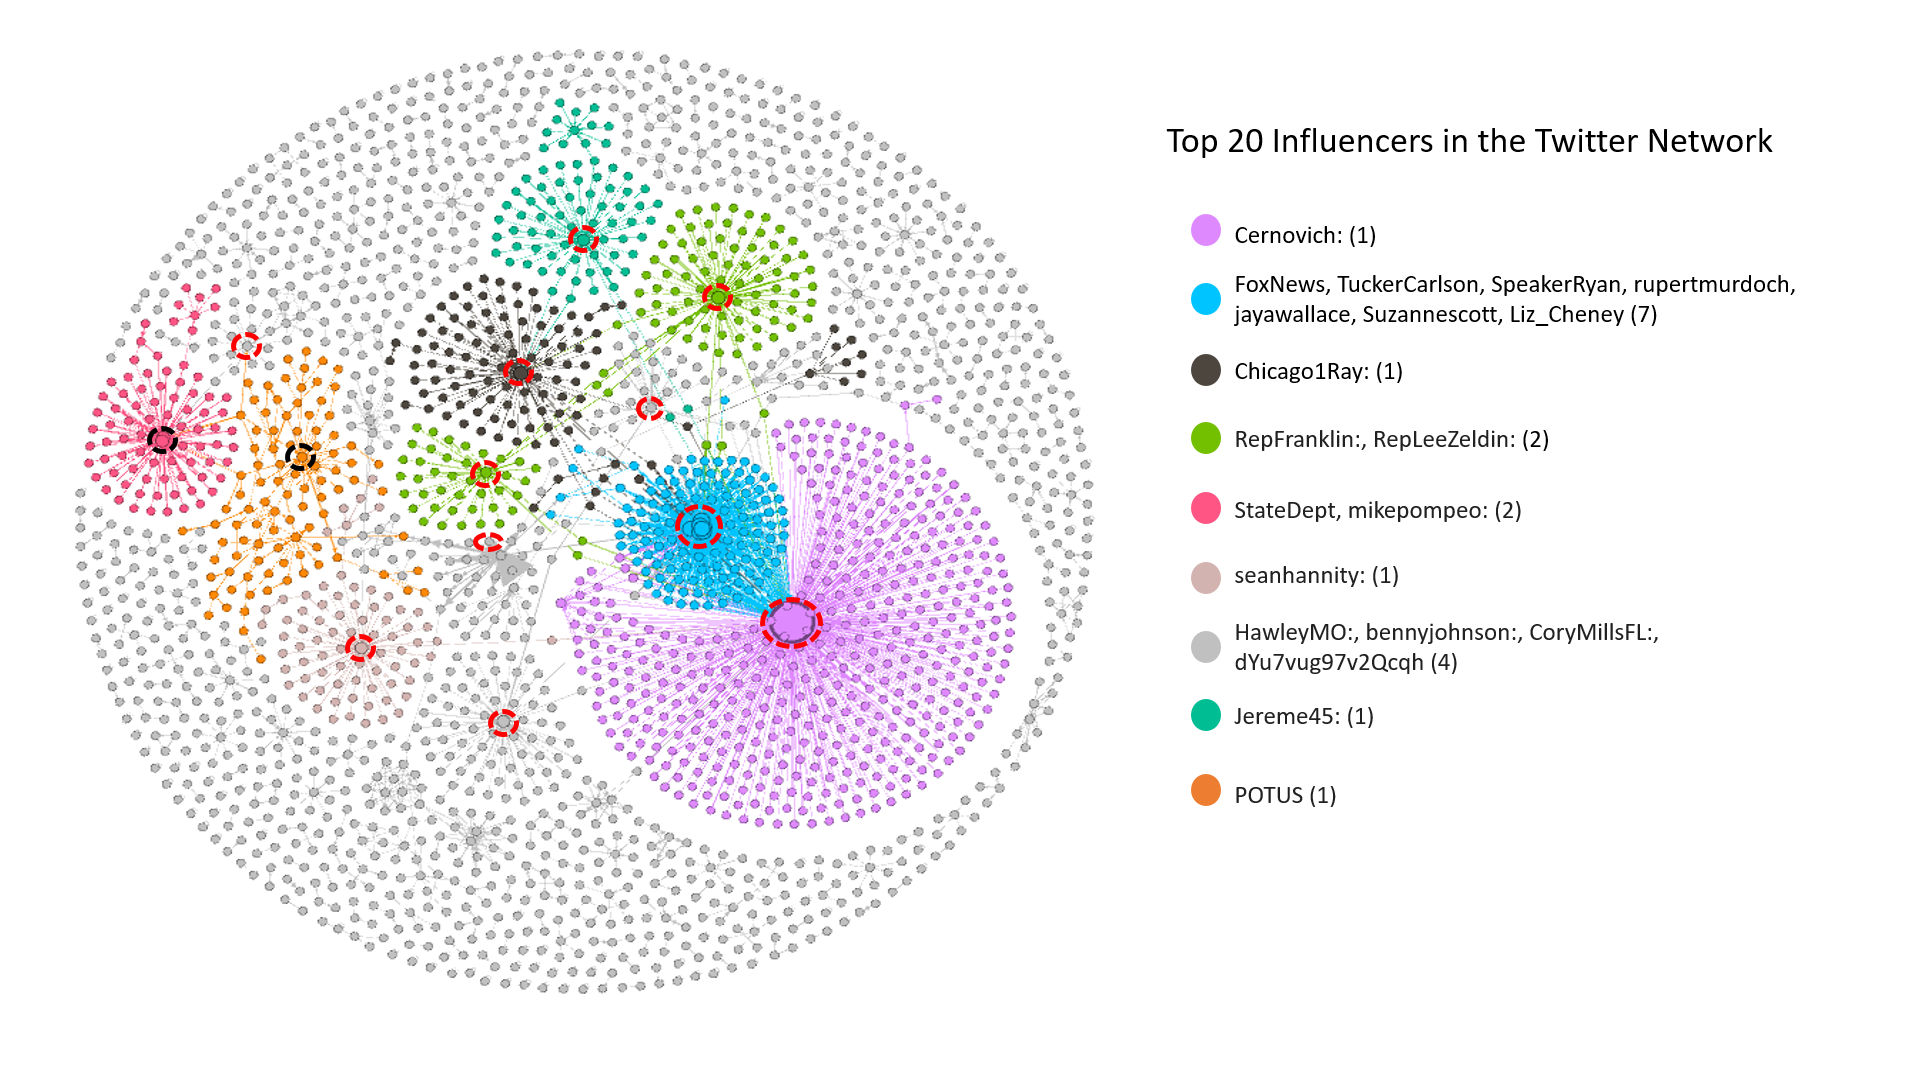